**The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.
Explore and analyze the data to discover key findings pertaining to terrorist activities.**

In [ ]:
#Conecting to google drive 
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing all the required liabraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud 

In [ ]:
#Importing the dataset 
path = ('/content/drive/MyDrive/Python for data science/Project/')
name = ('Global Terrorism Data.csv')
df = pd.read_csv(path+name, encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
#length of the data frame 
df.shape 

(181691, 135)

In [ ]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
#columns in the dataframe
list(df.columns) 

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [ ]:
#setting the display options 
pd.set_option('display.max_columns', None)

In [ ]:
df.head() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
#Renaming the column names which are required 
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','city':'City','region_txt':'Region','latitude':
                   'Latitude','longitude':'Longitude','attacktype1_txt':'Attack_Type', 'targtype1_txt':'Target', 'targsubtype1_txt':'Sub_Target', 'motive':'Motive', 
                   'weaptype1_txt':'Weapon', 'nkill':'Kill', 'nwound':'Wound', 'propextent_txt':'Property', 'ransomamt':'Ransom_Amt',
                   'ransompaid':'Ransom_paid', 'doubtterr':'Doubt_terr'}, inplace=True)

# **Data Cleaning**

In [ ]:
#Copying the columns which are required into a new dataset 
data = df[['Year', 'Month', 'Day', 'Country', 'State', 'City', 'Region', 'Attack_Type', 'Target', 
           'Sub_Target', 'Weapon', 'Kill', 'Wound', 'Doubt_terr', 'Ransom_Amt', 'Ransom_paid']]

In [ ]:
#first 5 fields in the required dataset 
data.head()

,Year,Month,Day,Country,State,City,Region,Attack_Type,Target,Sub_Target,Weapon,Kill,Wound,Doubt_terr,Ransom_Amt,Ransom_paid
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,Assassination,Private Citizens & Property,Named Civilian,Unknown,1.0,0.0,0.0,NaN,NaN
1,1970,0,0,Mexico,Federal,Mexico city,North America,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,0.0,0.0,0.0,800000.0,NaN
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,1.0,0.0,0.0,NaN,NaN
3,1970,1,0,Greece,Attica,Athens,Western Europe,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Explosives,NaN,NaN,0.0,NaN,NaN
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Incendiary,NaN,NaN,-9.0,NaN,NaN


In [ ]:
#last 5 fields in the required dataset 
data.tail()

,Year,Month,Day,Country,State,City,Region,Attack_Type,Target,Sub_Target,Weapon,Kill,Wound,Doubt_terr,Ransom_Amt,Ransom_paid
181686,2017,12,31,Somalia,Middle Shebelle,Ceelka Geelow,Sub-Saharan Africa,Armed Assault,Military,Military Checkpoint,Firearms,1.0,2.0,1.0,NaN,NaN
181687,2017,12,31,Syria,Lattakia,Jableh,Middle East & North Africa,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Explosives,2.0,7.0,1.0,NaN,NaN
181688,2017,12,31,Philippines,Maguindanao,Kubentog,Southeast Asia,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Incendiary,0.0,0.0,0.0,NaN,NaN
181689,2017,12,31,India,Manipur,Imphal,South Asia,Bombing/Explosion,Government (General),Government Building/Facility/Office,Explosives,0.0,0.0,0.0,NaN,NaN
181690,2017,12,31,Philippines,Maguindanao,Cotabato City,Southeast Asia,Bombing/Explosion,Unknown,NaN,Explosives,0.0,0.0,0.0,NaN,NaN


In [ ]:
#describing the data with its info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   City         181257 non-null  object 
 6   Region       181691 non-null  object 
 7   Attack_Type  181691 non-null  object 
 8   Target       181691 non-null  object 
 9   Sub_Target   171318 non-null  object 
 10  Weapon       181691 non-null  object 
 11  Kill         171378 non-null  float64
 12  Wound        165380 non-null  float64
 13  Doubt_terr   181690 non-null  float64
 14  Ransom_Amt   1350 non-null    float64
 15  Ransom_paid  774 non-null     float64
dtypes: float64(5), int64(3), object(8)
memory usage: 22.2+ MB


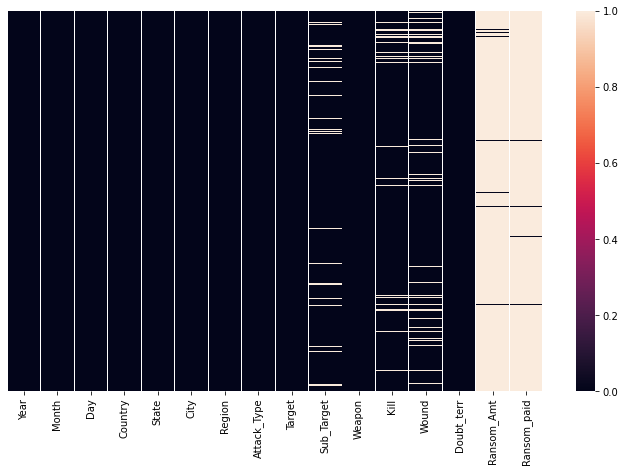

In [ ]:
#Representing the presence of NaN values in the heat map
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), yticklabels=False)
plt.show()

**Remarks**

**The horizontal lines shows the presence of NaN values in the respective columns.**
**Ransom_Amt, Ransom_paid, Motive, Property are the columns having most of the NaN values**

In [ ]:
#Filling the NaN values 
data['State'].fillna('Unknown', inplace=True)
data['City'].fillna('Unknown', inplace=True)
data['Region'].fillna('Unknown', inplace=True)
data['Sub_Target'].fillna('Unknown', inplace=True)

data['Ransom_Amt'] = data['Ransom_Amt'].fillna(0).astype(int)
data['Ransom_paid'] = data['Ransom_paid'].fillna(0).astype(int)
data['Kill'] = data['Kill'].fillna(0).astype(int)
data['Wound'] = data['Wound'].fillna(0).astype(int)
data['Doubt_terr'] = data['Doubt_terr'].fillna(0).astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

**Remarks**

**Filling catagorical values with Unknown and Numerical values with 0**

In [ ]:
#Checking any presence of NaN values in the data set
data.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
City           0
Region         0
Attack_Type    0
Target         0
Sub_Target     0
Weapon         0
Kill           0
Wound          0
Doubt_terr     0
Ransom_Amt     0
Ransom_paid    0
dtype: int64

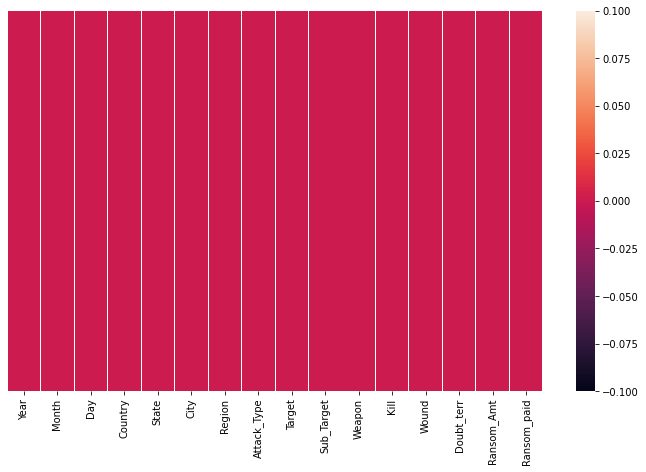

In [ ]:
#Representing the presence of NaN values in the heat map
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), yticklabels=False)
plt.show()

# **Data Visualization**



In [ ]:
#Exploratory Data Analysis
print('Country with most attacks: ',data['Country'].value_counts().idxmax())
print('City with most attacks: ',data['City'].value_counts().index[1])
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("State with the most attacks:", data['State'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Most Attack Types:",data['Attack_Type'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
State with the most attacks: Baghdad
Year with the most attacks: 2014
Month with the most attacks: 5
Most Attack Types: Bombing/Explosion


## **Attacks Vs Year**

In [ ]:
#Grouping the year to find out the total incidents
year = data['Year'].value_counts().sort_index()
year 

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

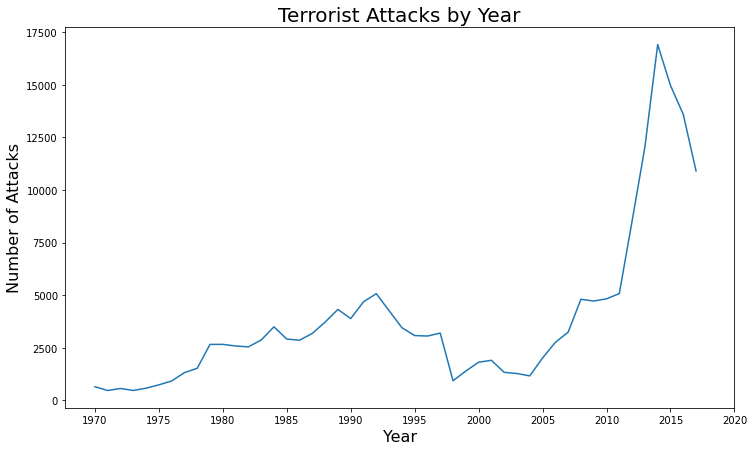

In [ ]:
#Plotting the Year wise incidents 
plt.figure(figsize=(12,7))
plt.plot(year)
plt.title("Terrorist Attacks by Year", size=20)
plt.ylabel("Number of Attacks", size=16)
plt.xlabel("Year", size=16)
plt.xticks(np.arange(1970, 2025, 5))
plt.show()

**Remaks:**

Showing the number of attacks over the years.

From the data we can say that in the year 2014 there are maximum number of attacks through all over the world.

## **Attacks Vs Months**

In [ ]:
#data of Attacks and their counts in respective months
attack_month = data.Month.value_counts()
attack_month.sort_index()

0        20
1     14936
2     13879
3     15257
4     15152
5     16875
6     15359
7     16268
8     15800
9     14180
10    15563
11    14906
12    13496
Name: Month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



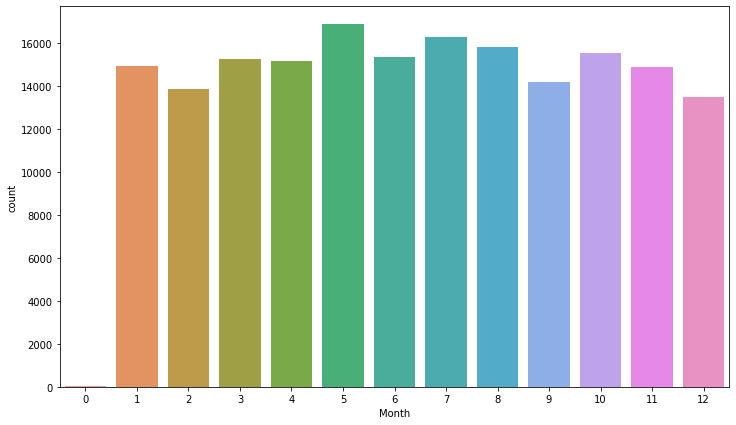

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data['Month'])
plt.show()

**Remarks**

Most of the attacks took place in the month of May

#**Attack Vs Day**

In [ ]:
#data of Attacks and their counts in respective months
attack_day = data.Day.value_counts()
attack_day.sort_index()

0      891
1     6344
2     5954
3     6011
4     6153
5     5844
6     5781
7     5997
8     5859
9     6057
10    6064
11    5936
12    6012
13    6043
14    6028
15    6500
16    6112
17    5852
18    5880
19    5973
20    5930
21    5827
22    5799
23    5782
24    5752
25    5875
26    5823
27    5937
28    6027
29    5507
30    5046
31    3095
Name: Day, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



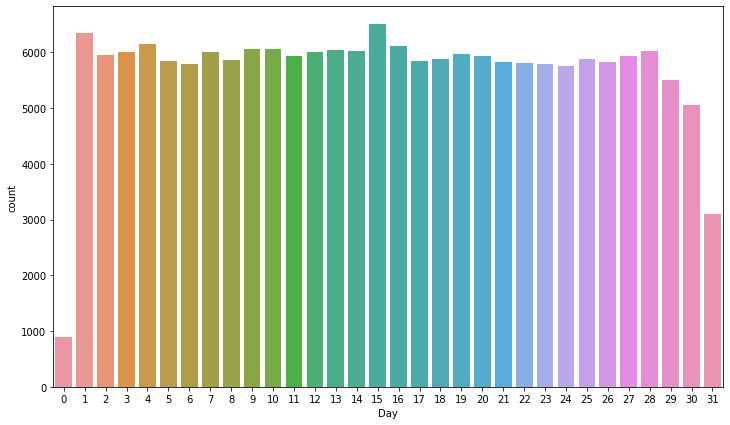

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data['Day'])
plt.show()

**Remarks**

Most frequently the incidents are taking place on starting and middle of the month and 0 value denotes the NaN values

## **Year Vs Attack Vs Region**

In [ ]:
#Terrorist attacks in different regions year wise
terror_region = pd.crosstab(data['Year'], data['Region'])
terror_region 

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


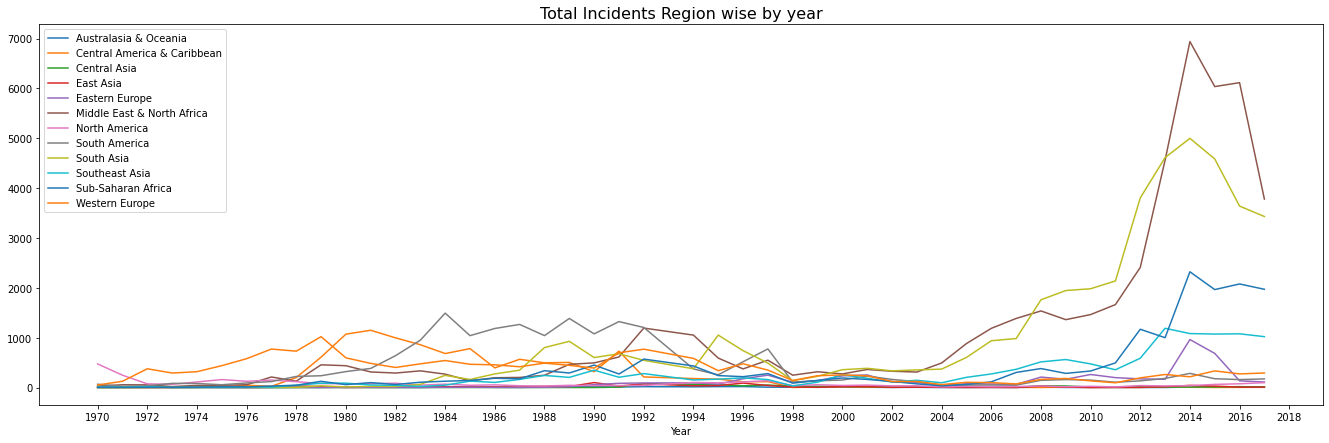

In [ ]:
 #plotting of the data of year vs attack vs region
fig = plt.figure(figsize=(23,7))
ax = fig.gca()
terror_region.plot(ax=ax)
plt.title("Total Incidents Region wise by year", size=16)
plt.xticks(np.arange(1970, 2020, 2))
plt.legend()
plt.show()


**Remarks**

From the above data we can say that there is rise during 1980 to 1997 laster the raise is seen in the number of incidents in between the years of 2008 and 2015.

## **Region Vs Attacks**

In [ ]:
#Attacks occured as per the region
region = data['Region'].value_counts()
region 

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

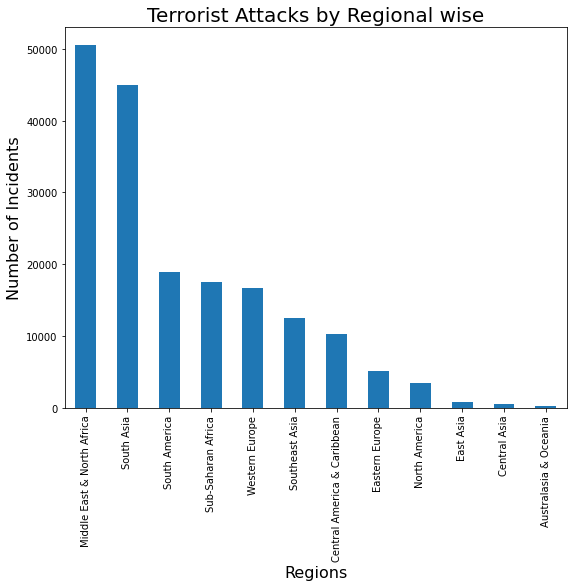

In [ ]:
#Plotting the data of regional wise attacks
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
region.plot(kind='bar', ax=ax)
ax.set_title("Terrorist Attacks by Regional wise", size=20)
ax.set_xlabel("Regions", size=16)
ax.set_ylabel("Number of Incidents", size=16)
plt.show()

**Remarks**


From the chat we can say that the Middle East & North Africa is getting attacked mostly.

Austraiasia & Occeania is least attacked.

#**Attack Type Vs Attack count**

In [ ]:
#Finding the attacks and their frequency 
attack_type = data['Attack_Type'].value_counts()
attack_type 

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

In [ ]:
#Finding the attacks and their frequency 
attack_type_df = data['Attack_Type'].value_counts().reset_index()
attack_type_df.rename(columns={'index':'Attack_type', 'Attack_Type':'Count'}, inplace=True)
attack_type_df 

,Attack_type,Count
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


In [ ]:
#plotting the data of attacks and their frequency 
fig = px.pie(attack_type_df, values='Count', names='Attack_type', title='Percentage share of Different Types of Attack')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

**Remarks**

Bombing/Explosion is the most frequent attack taking place.

Hijacking is the least attack.

# **Attack Type Vs Deaths**

In [ ]:
attack_type_deaths = data.groupby(['Attack_Type']).agg({'Kill':'sum'})
attack_type_deaths

,Kill
Attack_Type,
Armed Assault,160297
Assassination,24920
Bombing/Explosion,157321
Facility/Infrastructure Attack,3642
Hijacking,3718
Hostage Taking (Barricade Incident),4478
Hostage Taking (Kidnapping),24231
Unarmed Assault,880
Unknown,32381


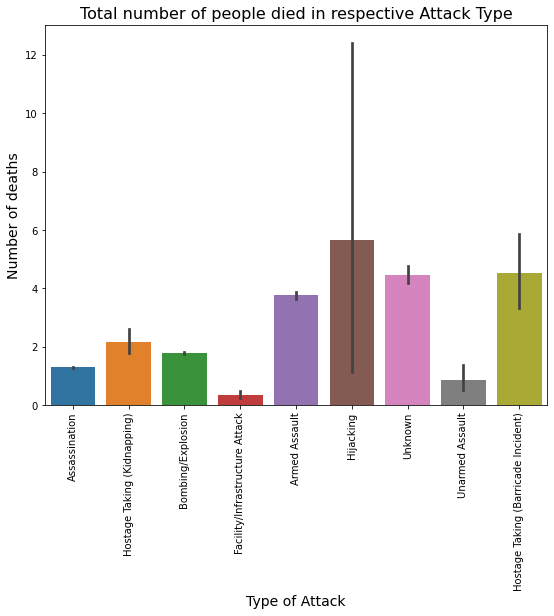

In [ ]:
#plotting the data of total number of deaths on respective attack types
plt.figure(figsize=(9,7))
sns.barplot(y='Kill', x='Attack_Type', data=data)
plt.xlabel('Type of Attack', size=14)
plt.ylabel('Number of deaths', size=14)
plt.title('Total number of people died in respective Attack Type', size=16)
plt.xticks(rotation=90)
plt.show()

#**Region Vs Deaths and Injured**

In [ ]:
#Summing the total killed and wounded by region wise 
killed_wounded = data.groupby(['Region']).agg({'Kill':'sum', 'Wound':'sum'})
killed_wounded 

,Kill,Wound
Region,,
Australasia & Oceania,150,260
Central America & Caribbean,28708,8991
Central Asia,1000,2009
East Asia,1152,9213
Eastern Europe,7415,12045
Middle East & North Africa,137642,214308
North America,4916,21531
South America,28849,16704
South Asia,101319,141360


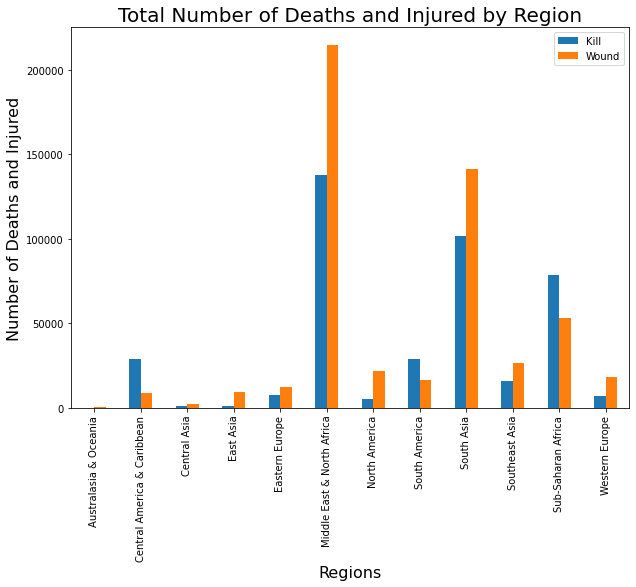

In [ ]:
#Plotting the data of killed and wounded by region wise 
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
killed_wounded.plot(kind='bar', ax=ax)
plt.title("Total Number of Deaths and Injured by Region", size=20)
plt.ylabel("Number of Deaths and Injured", size=16)
plt.xlabel("Regions", size=16)
plt.show() 

**Remarks**

From the data we can say that the Middle East & North Africa and Australasia & Oceania regions are the most and least effected regions respectively.

#**Region Vs Ransom_Amount**

**Ransom Amount demanded and paid**

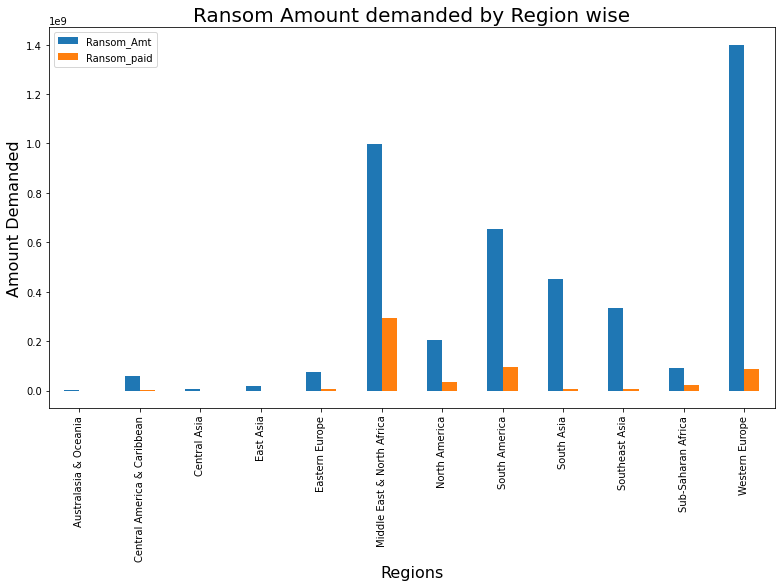

In [ ]:
#Plotting the data of Ransom amount demanded by region wise
ransom = data.groupby(['Region']).agg({'Ransom_Amt':'sum', 'Ransom_paid':'sum'})

fig = plt.figure(figsize=(13,7))
ax = fig.gca()
ransom.plot(kind='bar', ax=ax)
plt.title("Ransom Amount demanded by Region wise", size=20)
plt.ylabel("Amount Demanded", size=16)
plt.xlabel("Regions", size=16)
plt.xticks(rotation=90)
plt.show()

**Remarks**

Western Europe region was demanded more and Middle East & North Africa Region paid more

#**Targets and its value counts**

In [ ]:
#Tabular Data of targets and their value counts
target = data['Target'].value_counts()
target

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



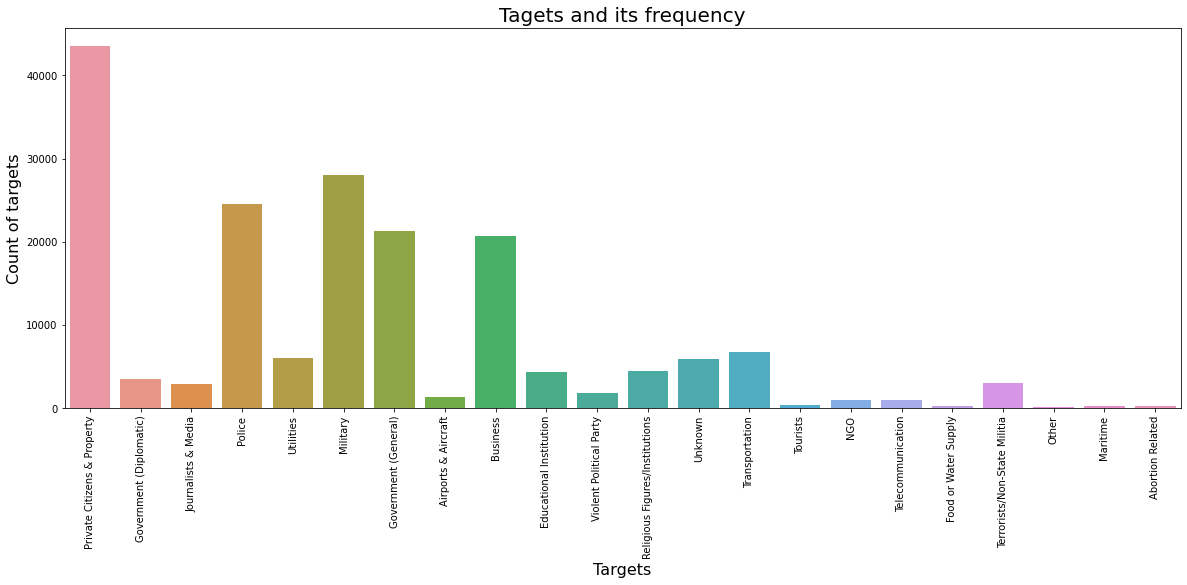

In [ ]:
#plotting of data of targets and their value counts 
fig = plt.figure(figsize=(20,7))
ax = fig.gca()
#target.plot(kind='bar', ax=ax)
sns.countplot(data['Target'])
plt.title("Tagets and its frequency", size=20)
plt.ylabel("Count of targets", size=16)
plt.xlabel("Targets", size=16)
plt.xticks(rotation=90)
plt.show()

# **Target Vs Deaths**

In [ ]:
target_type_deaths = data.groupby(['Target']).agg({'Kill':'sum'})
target_type_deaths 

,Kill
Target,
Abortion Related,10
Airports & Aircraft,3767
Business,23487
Educational Institution,3745
Food or Water Supply,313
Government (Diplomatic),3039
Government (General),26071
Journalists & Media,1501
Maritime,1191


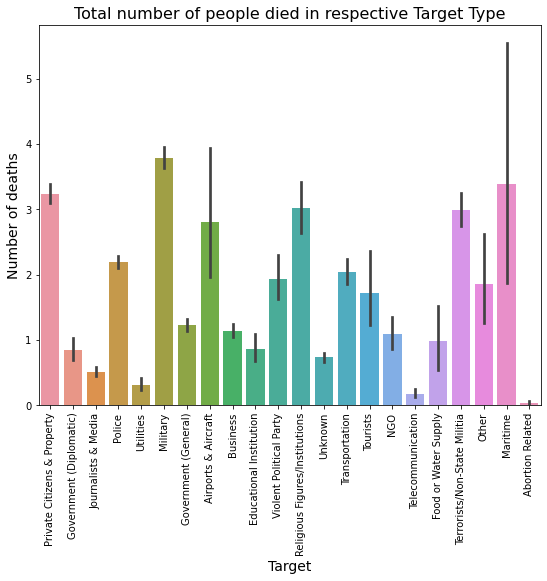

In [ ]:
#plotting the data of total number of deaths on respective target types
plt.figure(figsize=(9,7))
sns.barplot(y='Kill', x='Target', data=data)
plt.xlabel('Target', size=14)
plt.ylabel('Number of deaths', size=14)
plt.title('Total number of people died in respective Target Type', size=16)
plt.xticks(rotation=90)
plt.show()

#**Sub Targets and their value counts**

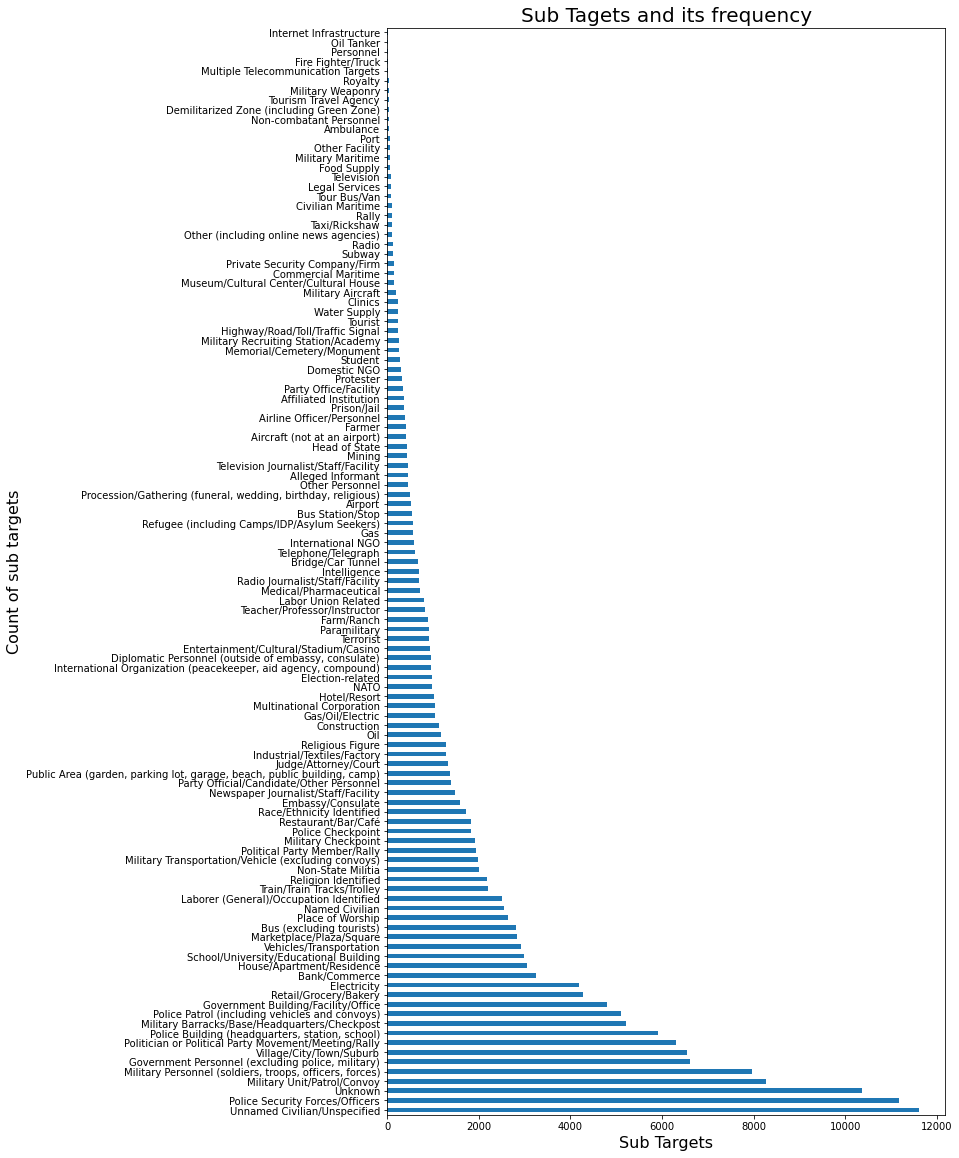

In [ ]:
#plotting of data of sub-targets and their value counts
sub_target = data['Sub_Target'].value_counts()

fig = plt.figure(figsize=(10, 20))
ax = fig.gca()
sub_target.plot(kind='barh', ax=ax)
plt.title("Sub Tagets and its frequency", size=20)
plt.ylabel("Count of sub targets", size=16)
plt.xlabel("Sub Targets", size=16)
plt.show()

## **Top 20 Countries affected mostly**

In [ ]:
#Data of top affected countries
attack_country = data.Country.value_counts()[:20]
attack_country 

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



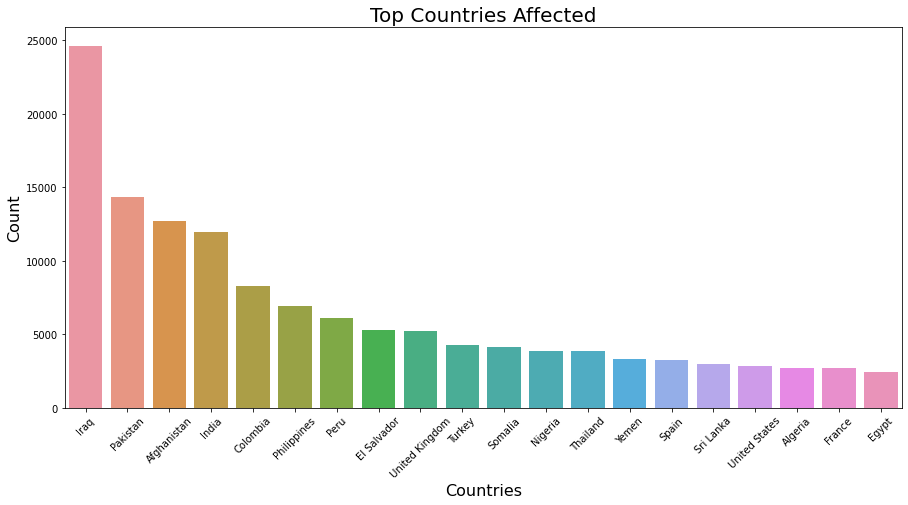

In [ ]:
#plotting of data of Top affected countries
plt.figure(figsize=(15,7))
sns.barplot(attack_country.index, attack_country.values)
plt.title('Top Countries Affected', size=20)
plt.xlabel('Countries', size=16)
plt.ylabel('Count', size=16)
plt.xticks(rotation= 45)
plt.show()

#**Number of Deaths and Injured by Years**

In [ ]:
#data of deaths and injured by years
year_killed_wounded = data.groupby(['Year']).agg({'Kill':'sum','Wound':'sum'})
year_killed_wounded = year_killed_wounded.reset_index()
year_killed_wounded

,Year,Kill,Wound
0,1970,174,212
1,1971,173,82
2,1972,566,409
3,1973,370,495
4,1974,539,865
5,1975,617,617
6,1976,674,756
7,1977,456,518
8,1978,1459,1600
9,1979,2100,2506


In [ ]:
#scatter plot showing the total number of deaths and injured in the particular year 
fig = px.scatter(year_killed_wounded, x='Year', y ='Kill', size='Wound', title="Total number of people killed and wounded in the year")
fig.show()

#**Weapons Vs Attacks**




In [ ]:
#Types of weapons used mostly in the attacks
data['Weapon'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

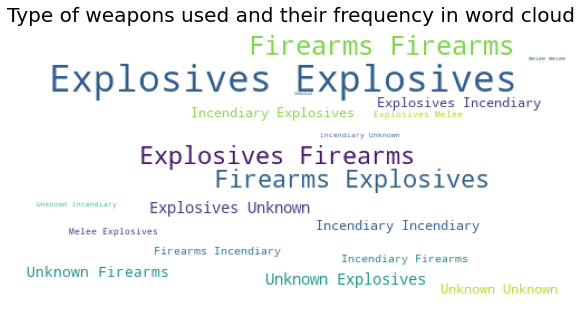

In [ ]:
#plotting the type of weapons used and their frequency in word cloud
weapons = data['Weapon']
plt.figure(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(weapons))
plt.axis('off')
plt.title("Type of weapons used and their frequency in word cloud", size=20)
plt.imshow(wordcloud)
plt.show()

**Remarks**

Explosives are mostly used in the incidents.

Fake Weapons and Radiologicals are rarely used

#**Doubt Terror Attacks**

In [ ]:
#Data showing the terror attacks that are recognised as doubt teror
doubt_terror_df = data['Doubt_terr'].value_counts().reset_index()
doubt_terror_df.rename(columns={'index':'Doubt_terror','Doubt_terr':'Count'}, inplace=True)
doubt_terror_df

,Doubt_terror,Count
0,0,138906
1,1,29001
2,-9,13784


In [ ]:
fig = px.pie(doubt_terror_df, values='Count', names='Doubt_terror', title='Percentage share of Doubt Terror Attacks')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

**Remarks**

1 - There is doubt as to whether the incident is an act of terrorism

0 - There is essentially no doubt as to whether the incident is an act of ter
terrorism.

-9 - The data was not recorded at the time of data collection

In [ ]:
from scipy import signal
